In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix,accuracy_score
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import matplotlib as mpl

# Consume Data

This notebooks reads the data from `data/Churn_Modelling.csv` then I analyzed the data first before I did churn modeling.

In [2]:
df = pd.read_csv("../data/Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Before being explored further, the dataset `Churn_Modelling.csv` is seen in advance the distribution of the data

# Target Description

Here I use `Target Variable` in column `Exited`. 

In [3]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

On `Target Variable`, I defined:
0 = Not Churn (Stay);
1 = Churn

Next, I see how many customers choose to churn or stay.

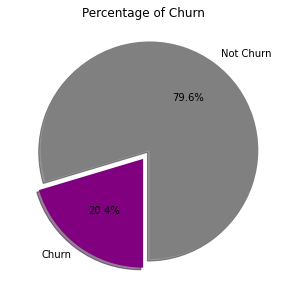

In [4]:
# Elemen Pie Chart
sizes = df['Exited'].value_counts(sort = True)
colors = ["grey","purple"] 
mpl.rcParams['figure.figsize'] = 5,5
labels = "Not Churn","Churn"
explode = (0.1,0)
# Pie Chart
plt.pie(sizes, 
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn')
plt.show()

Customers who choose to stay (Not Churn) have a higher proportion than customers who choose to churn, the proportion is respectively 80:20. Indicates that there are still more customers who like the products at the bank.

Next, we look at the characteristics of each independent variable on the customer's "Churn" condition.

# Statistics Descriptive

## 1. Credit Score Feature

In [5]:
#Credit Score
df["CreditScore"].groupby(df["Exited"]).mean()

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

Churn customers have a slightly smaller average credit compared to customers who choose to stay. Even so, the difference in the average credit score for customers who stay and churn is not too different.

## 2. Tenure Feature

In [6]:
#Tenure
df["Tenure"].groupby(df["Exited"]).mean()

Exited
0    5.033279
1    4.932744
Name: Tenure, dtype: float64

*The unit of Tenure Feature is defined as month*.

Both customers who choose to churn or not, have an average product usage of around 5 months.

## 3. Num of Products Feature

In [7]:
#NumOfProducts
df["NumOfProducts"].groupby(df["Exited"]).sum()

Exited
0    12297
1     3005
Name: NumOfProducts, dtype: int64

Customers who choose to stay have greater total product usage compared to customers who churn. However, this figure is highly dependent on the number of customers in each category.

In [8]:
#NumOfProducts
df["NumOfProducts"].groupby(df["Exited"]).mean()

Exited
0    1.544267
1    1.475209
Name: NumOfProducts, dtype: float64

So, when viewed from the average use of the number of products, the two types of customers both have an average number of product uses around 1.5, or both types of customers use an average of 1 to 2 bank products.

## 4. Geography Feature

In [9]:
#Geography
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
#make cross tabulation for geography based on exited status
geo_cross = pd.crosstab(df.Geography,df.Exited)
geo_cross["%_churn"] = (geo_cross[1]/(geo_cross[0]+geo_cross[1]))*100
geo_cross

Exited,0,1,%_churn
Geography,,,
France,4204,810,16.154767
Germany,1695,814,32.443204
Spain,2064,413,16.673395


<AxesSubplot:xlabel='Geography'>

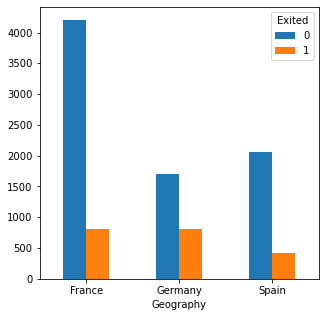

In [12]:
geo_cross[[0,1]].plot(kind='bar', stacked=False, rot=0)

About half of the total number of customers are from France, but customers from Germany have about twice the proportion of customers who churn than customers from France and Spain.

## 5. Balance Feature

In [13]:
#Balance
df["Balance"].groupby(df["Exited"]).mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

*The currency used is defined as the Euro because geographically, customers come from 3 European countries*.

It can be seen that customers who are churn actually have a fairly high average balance compared to customers who are stay. The difference is quite high, which is around 20,000 Euros.

## 6. Estimated Salary Feature

In [14]:
#Salary
df["EstimatedSalary"].groupby(df["Exited"]).mean()

Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64

*The currency used is defined as the Euro because geographically, customers come from 3 European countries*.

Estimated salary (income) of customers who churn has an average higher than customers who choose to stay. Even so, the difference is not as big as Balance Feature, which is around 2,000 Euros.

## 7. Gender

In [15]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [16]:
#Gender
gender_cross = pd.crosstab(df.Gender,df.Exited)
gender_cross["%_churn"] = (gender_cross[1]/(gender_cross[0]+gender_cross[1]))*100
gender_cross

Exited,0,1,%_churn
Gender,,,
Female,3404,1139,25.071539
Male,4559,898,16.455928


<AxesSubplot:xlabel='Gender'>

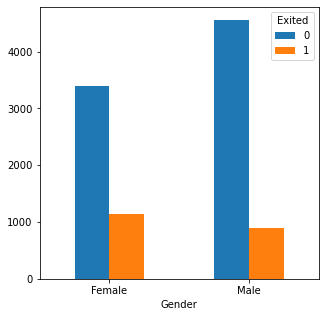

In [17]:
gender_cross[[0,1]].plot(kind='bar', stacked=False, rot=0)

The proportion of male and female customers is not too different, but female customers have a greater proportion of churn than male customers.

## 8. Has Credit Card Feature

In [18]:
df["HasCrCard"].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

*Defined:

0 = customer does not have credit card,
1 = customer have credit card

In [19]:
#Has Credit Card
crcard_cross = pd.crosstab(df.HasCrCard,df.Exited)
crcard_cross["%_churn"] = (crcard_cross[1]/(crcard_cross[0]+crcard_cross[1]))*100
crcard_cross

Exited,0,1,%_churn
HasCrCard,,,
0,2332,613,20.814941
1,5631,1424,20.184266


<AxesSubplot:xlabel='HasCrCard'>

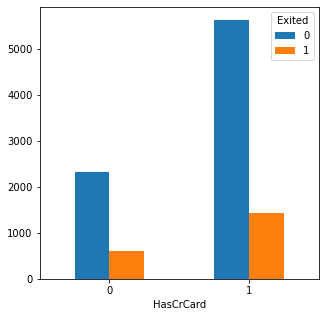

In [20]:
crcard_cross[[0,1]].plot(kind='bar', stacked=False, rot=0)

Most customers have credit cards with a ratio of around 7:3. However, the proportion of customers who churn is not too different between customers who have credit cards and those who do not.

## 9. Active Member Feature

In [21]:
df["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

*Defined:

0 = not active member,
1 = active member

In [22]:
#Is Active Member
actmember_cross = pd.crosstab(df.IsActiveMember,df.Exited)
actmember_cross["%_churn"] = (actmember_cross[1]/(actmember_cross[0]+actmember_cross[1]))*100
actmember_cross

Exited,0,1,%_churn
IsActiveMember,,,
0,3547,1302,26.850897
1,4416,735,14.269074


<AxesSubplot:xlabel='IsActiveMember'>

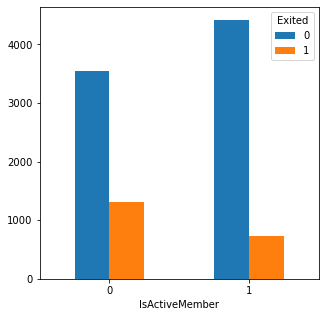

In [23]:
actmember_cross[[0,1]].plot(kind='bar', stacked=False, rot=0)

The number of customers who are active members is slightly more than those who are not active, and the proportion of customers who have churn is higher among customers who are not active members.

## 10. Generation

The Age variable is changed to a generational variable that classifies age groups based on their generation.

- Age less than up to 26 years: Gen Z
- Age between 27-40 years: Millenials Generation
- Age between 41-56 years: X Generation
- Age between 57-75 years: Baby Boomer Generation
- Age more than 75 years: Traditionalists Generation

Source: https://binus.ac.id/knowledge/2019/12/populasi-dunia-terbagi-dalam-berbagai-generasi-apa-saja/

In [24]:
age_condition = [(df["Age"]<=26),
                (df["Age"] >26) & (df["Age"] <= 40),
                (df["Age"] >40) & (df["Age"] <= 56),
                (df["Age"] >56) & (df["Age"] <= 75),
                (df["Age"] >75)]
age_gen = ["Gen Z","Millenials", "Gen X", "Baby Boomer", "Traditionalists"]
df["gen"]=np.select(age_condition,age_gen)

In [25]:
df["gen"].value_counts()

Millenials         5608
Gen X              2851
Gen Z               811
Baby Boomer         685
Traditionalists      45
Name: gen, dtype: int64

In [26]:
#Generation
gen_cross = pd.crosstab(df.gen,df.Exited)
gen_cross["%_churn"] = (gen_cross[1]/(gen_cross[0]+gen_cross[1]))*100
gen_cross

Exited,0,1,%_churn
gen,,,
Baby Boomer,442,243,35.474453
Gen X,1744,1107,38.828481
Gen Z,751,60,7.398274
Millenials,4982,626,11.162625
Traditionalists,44,1,2.222222


<AxesSubplot:xlabel='gen'>

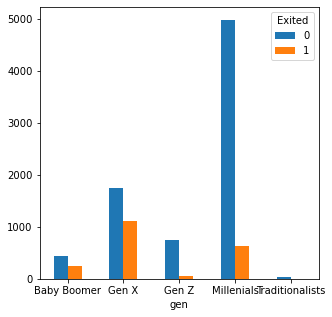

In [27]:
gen_cross[[0,1]].plot(kind='bar', stacked=False, rot=0)

In terms of numbers, customers who are Millennials Generation greatly dominate customers with a total of 5608 or more than half of the total customers. Followed by customers from Generation X, Baby Boomer Generation, Generation Z, and the least are Generation Traditionalists

However, the largest proportion of customers who churn are from Generation X and Baby Boomer Generation. Generation Z and Millennials have a relatively small proportion of churn with a proportion of less than 12%. Meanwhile, Generasi Traditionalists only had 1 customer who churn.

Because there are several age categories that have a small frequency in the churn customer category, especially the Traditionalist Generation, the Age variable will be used like a numerical variable. This is because to prevent information loss on this variable, because in a case of randomization of the train and test datasets, the Churned Traditionalist Generation may not be recorded in the train dataset. So the behavior patterns of the Traditionalist Generation who choose to churn cannot be predicted by the model.

# Feature Selection

Feature selection is carried out to identify which features will have a significant effect on the model or not. Two feature selections methods are used, namely the Chi-Square test for categorical independent variables and the Correlation Test for numerical variables.

## Chi-Square Test

Chi-Square Test aims to see the relationship between two categorical variables. Chi-square test can also see whether a categorical independent variable can affect the dependent variable or not.

An alpha error rate (α) of 5% is used to test the hypothesis as follows:
- H0 (initial hypothesis) is the independent variable has no effect on the dependent variable;
- H1 (alternative hypothesis) is the independent variable has an effect on the dependent variable.

The test statistic is used in the form of a P-Value (the probability of not rejecting H0). H0 is rejected if the P-Value < α (0.05).

In [28]:
#List categoric variabls to be tested along with the target variable
ft_cat = ["Geography",
         "Gender",
         "HasCrCard",
         "IsActiveMember",
         "Exited"]

In [29]:
#Generate dataframe which contain only categoric variables
df_cat = df[ft_cat]

In [30]:
#Generate Chi-Square test function
def getCsqVal(ft):
    df_cross = pd.crosstab(df_cat['Exited'], df_cat[ft])
    c_sq,p_val,df,data = stats.chi2_contingency(df_cross)
    return c_sq,p_val

In [31]:
#Using for loop to generate chi-square tests result for each categoric variables
chi_rslt = pd.DataFrame(columns=['variable', 'chisq', 'pvalue'])
for n,a in enumerate([a for a in df_cat.columns if a != 'Exited']):
    chisq, pval = getCsqVal(a)
    pdData = [a,chisq, pval]
    chi_rslt.loc[n] = [a,chisq,pval]

In [32]:
#memberikan kesimpulan pada hasil chi-square test
chi_rslt['results'] = np.where(chi_rslt.pvalue < 0.05,'Statistically Significant Associated','Statistically Not Significant Associated')

In [33]:
chi_rslt

,variable,chisq,pvalue,results
0,Geography,301.255337,3.830318e-66,Statistically Significant Associated
1,Gender,112.918571,2.248210e-26,Statistically Significant Associated
2,HasCrCard,0.471338,4.923724e-01,Statistically Not Significant Associated
3,IsActiveMember,242.985342,8.785858e-55,Statistically Significant Associated


Almost all categorical variables have a P-Value greater than α (0.05), except for the HasCrCard variable. So that the HasCrCard variable is not included in the model formation.

## Correlation Numeric Independent Variables (Multicollinearity Test)

Multicollinearity is the term used when there is a relationship between numerical independent variables (interval and ratio scales).

The existence of multicollinearity causes the results of the analysis to be inconsistent because the slightest change in an independent variable will affect other related variables.

To detect the presence of multicollinearity, you can measure the correlation coefficient (r) of Pearson's Correlation for each numerical independent variable. The value of the correlation coefficient (r) ranges from -1 to 1. If the value of r is negative, then the correlation between the two variables is negative (one variable increases in value, the other variable decreases in value). If the value of r is positive, then the correlation between the two variables is positive (one increases in value, the other variable increases too). With the following scale (regardless of positive and negative):

- Value r 0.00 - 0.19 : Very Weak Correlation
- Value r 0.20 - 0.39 : Weak Correlation
- Value r 0.40 - 0.69 : Moderate Correlation
- Value r 0.70 - 0.89 : Strong Correlation
- Value r 0.90 - 1.00 : Very Strong Correlation

Sumber: https://geographyfieldwork.com/SpearmansRankCalculator.html

Correlation between variables is considered to have multicollinearity if the correlation coefficient (r) is more than 0.50 or Moderate Correlation to Very Strong Correlation.

In [34]:
#list variabel numerik
ft_num = ["CreditScore",
          "Tenure",
          "Balance",
          "NumOfProducts",
          "EstimatedSalary",
         "Age"]

In [35]:
#dataframe which contain numeric variables
df_num = df[ft_num]

In [36]:
#calculating the correlation between numerical independent variables
corr = df_num.corr()

In [37]:
corr

,CreditScore,Tenure,Balance,NumOfProducts,EstimatedSalary,Age
CreditScore,1.000000,0.000842,0.006268,0.012238,-0.001384,-0.003965
Tenure,0.000842,1.000000,-0.012254,0.013444,0.007784,-0.009997
Balance,0.006268,-0.012254,1.000000,-0.304180,0.012797,0.028308
NumOfProducts,0.012238,0.013444,-0.304180,1.000000,0.014204,-0.030680
EstimatedSalary,-0.001384,0.007784,0.012797,0.014204,1.000000,-0.007201
Age,-0.003965,-0.009997,0.028308,-0.030680,-0.007201,1.000000


It can be seen that the highest correlation is found in the correlation of the NumOfProducts VS Balance variable. But the value is still around -0.3 or Weak Correlation. So it can be said that there is no multicollinearity in the numerical independent variables in this dataset and all numerical variables can be included in the model formation.

## Used Features

Generating dataframe that uses the features that have been filtered in Feature Selection.

In [38]:
#pembentukan list fitur yang digunakan
use_feat = ft_cat + ft_num
use_feat.remove("HasCrCard") #HasCrCard not passed chi-square test

In [39]:
#dataframe which used features
df_use = df[use_feat]

## Data Transform

One Hot Encoding (dummy variable)

Machine Learning can only analyze numeric variables, but categorical variables are often found that are not numeric (such as gender). Then this variable must be translated into a number variable. Like Gender Male becomes 1 and Female becomes 0. This process is called Encoding.

If there are more than two categories in one variable, then the One-Hot Encoding method (dummy variable formation) can be used which can spread each category in a column into several columns.

In [40]:
#variable list to create dummy variables
one_hot_ft = ["Geography"]

In [41]:
#generating dummy variable
df_use = pd.get_dummies(df_use, columns = one_hot_ft)

In [42]:
df_use.head(5)

,Gender,IsActiveMember,Exited,CreditScore,Tenure,Balance,NumOfProducts,EstimatedSalary,Age,Geography_France,Geography_Germany,Geography_Spain
0,Female,1,1,619,2,0.00,1,101348.88,42,1,0,0
1,Female,1,0,608,1,83807.86,1,112542.58,41,0,0,1
2,Female,0,1,502,8,159660.80,3,113931.57,42,1,0,0
3,Female,0,0,699,1,0.00,2,93826.63,39,1,0,0
4,Female,1,0,850,2,125510.82,1,79084.10,43,0,0,1


It can be seen that the results for the Geography variable will appear in three new columns, each of which translates a category in the Geography variable (Germany, France, and Spain).

Now, I have to change gender variable from string type to integer type

In [43]:
#generating dictionary for Male become 1, and Female become 0
gender_condition = [(df_use["Gender"]=="Male"),
                (df["Gender"] =="Female")]
gender = [1,0]

In [44]:
#mapping gender
df_use["cod_gender"]=np.select(gender_condition,gender)

In [45]:
#drop Gender Variable
df_use = df_use.drop(columns=["Gender"])

In [46]:
df_use.head(5)

,IsActiveMember,Exited,CreditScore,Tenure,Balance,NumOfProducts,EstimatedSalary,Age,Geography_France,Geography_Germany,Geography_Spain,cod_gender
0,1,1,619,2,0.00,1,101348.88,42,1,0,0,0
1,1,0,608,1,83807.86,1,112542.58,41,0,0,1,0
2,0,1,502,8,159660.80,3,113931.57,42,1,0,0,0
3,0,0,699,1,0.00,2,93826.63,39,1,0,0,0
4,1,0,850,2,125510.82,1,79084.10,43,0,0,1,0


Gender Variable has been changed to integer and its new name is cod_gender

# Modelling

## 1. Logistic Regression

The Logistic Regression model allows to analyze the dependent variable in the form of ordinal data, so it is often included in the category of classification algorithms.

In [47]:
#define independent columns and target (dependent) column
ind_col = df_use.loc[:, df_use.columns != 'Exited']
dep_col = df_use.loc[:, df_use.columns == 'Exited']

In [48]:
#Split dataset into train and test dataset
#using ratio 30% for test dataset and 70% for training dataset
X_train, X_test, y_train, y_test = train_test_split(ind_col,
                                                    dep_col,
                                                    test_size=0.3,
                                                    random_state=123)

In [49]:
#define the model
logit_model=sm.Logit(y_train,X_train)

In [50]:
#fitting model to calculate coefficient model
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.432125
         Iterations 6


In [51]:
#generating test prediction result for test dataset
yhat = result.predict(X_test)
prediction = list(map(round, yhat))

#### Model Evaluation

The confusion matrix is used to see the performance of accuracy, precision, and recall/sensitivity.

In [52]:
cm = confusion_matrix(y_test, prediction)

In [53]:
df_confMatrix = pd.DataFrame(cm, columns=['predicted_not_churn','predicted_churn'], index = ['not_churn','churn'])

print("Precision = {}".format(cm[1][1]/(cm[1][1]+cm[0][1])))
print("Recall/Sensitivity = {}".format(cm[1][1]/(cm[1][1]+cm[1][0])))
print("Accuracy = {}".format((cm[0][0]+cm[1][1])/(sum(sum(cm)))))
df_confMatrix

Precision = 0.6380090497737556
Recall/Sensitivity = 0.23305785123966943
Accuracy = 0.8186666666666667


,predicted_not_churn,predicted_churn
not_churn,2315,80
churn,464,141


The Logistic Regression model that has been made has an accuracy of 81.8% or 81.8% of the test dataset can be correctly predicted by this model. This figure is pretty good because it means the model is not overfitting.

However, when looking at the Precision value, it can be seen that the value is only around 63.8%. This means that the model can correctly predict that only 63.8% of customers will churn.

Meanwhile, the Recall/Sensitivity value is also very small, namely 23.3%. This means that only 23.3% of churn customers were correctly predicted as churn customers. So that other methods can be used to get better results.

## 2. Decision Tree

Decision Tree Regression is a decision support that uses a graph or decision model like a tree along with the possible consequences based on the circumstances/decisions taken. Decision Tree Regression is one way to present an algorithm consisting only of conditional control statements.

In [54]:
clf = DecisionTreeClassifier()

In [55]:
clf_res = clf.fit(X_train,y_train)

In [56]:
#generating test prediction result for test dataset
yhat_dt = clf_res.predict(X_test)
prediction_dt = list(map(round, yhat_dt))

#### Model Evaluation

The confusion matrix is used to see the performance of accuracy, precision, and recall/sensitivity.

In [57]:
cm_dt = confusion_matrix(y_test, prediction_dt)

In [58]:
df_confMatrix_dt = pd.DataFrame(cm_dt, columns=['predicted_not_churn','predicted_churn'], index = ['not_churn','churn'])

print("Precision = {}".format(cm_dt[1][1]/(cm_dt[1][1]+cm_dt[0][1])))
print("Recall/Sensitivity = {}".format(cm_dt[1][1]/(cm_dt[1][1]+cm_dt[1][0])))
print("Accuracy = {}".format((cm_dt[0][0]+cm_dt[1][1])/(sum(sum(cm_dt)))))
df_confMatrix_dt

Precision = 0.5037481259370314
Recall/Sensitivity = 0.5553719008264463
Accuracy = 0.8


,predicted_not_churn,predicted_churn
not_churn,2064,331
churn,269,336


The Decision Tree model that has been created has an accuracy of 79.7% or 79.7% of the test dataset can be correctly predicted by this model. This figure is quite good, but still lower than the Logistic Regression accuracy value.

Likewise, when looking at the Precision value, it can be seen that the value is only around 49.7%. This means that the model can correctly predict that only 49.7% of customers will churn. This figure is also still smaller than the Logistic Regression model.

Meanwhile, the Recall/Sensitivity value is better than the Logistic Regression, which is 55.5%. This means that 55.5% of customers who churn are correctly predicted as churn customers. With a small accuracy value and small precision, other methods can be used to get better results.

## 3. Random Forest

Random Forest is a machine learning algorithm that uses a decision tree as a basis. Then the decision tree model is strengthened by an ensemble method called bagging. In other words, the Random Forest forms many Decision Trees which are then taken by combinations of rules from the Decision Trees that have been formed to form a more complex decision tree.

In [59]:
#Random Forest Model
clf_rf = RandomForestClassifier()

In [60]:
clf_res_rf = clf_rf.fit(X_train,y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [61]:
#generating test prediction result for test dataset
yhat_rf = clf_res_rf.predict(X_test)
prediction_rf = list(map(round, yhat_rf))

#### Model Evaluation

The confusion matrix is used to see the performance of accuracy, precision, and recall/sensitivity.

In [62]:
cm_rf = confusion_matrix(y_test, prediction_rf)

In [63]:
df_confMatrix_rf = pd.DataFrame(cm_rf, columns=['predicted_not_churn','predicted_churn'], index = ['not_churn','churn'])

print("Precision = {}".format(cm_rf[1][1]/(cm_rf[1][1]+cm_rf[0][1])))
print("Recall/Sensitivity = {}".format(cm_rf[1][1]/(cm_rf[1][1]+cm_rf[1][0])))
print("Accuracy = {}".format((cm_rf[0][0]+cm_rf[1][1])/(sum(sum(cm_rf)))))
df_confMatrix_rf

Precision = 0.7956403269754768
Recall/Sensitivity = 0.4826446280991736
Accuracy = 0.8706666666666667


,predicted_not_churn,predicted_churn
not_churn,2320,75
churn,313,292


The Random Forest model that has been made has an accuracy of 86.7% or 86.7% of the test dataset can be correctly predicted by this model. This figure is the best figure among the three models used.

Likewise, when looking at the Precision value, it can be seen that the value is around 77.8%. This means that the model can correctly predict that customers will churn by 77.8%. This figure is also the largest figure among the other two models.

Meanwhile, the Recall/Sensitivity value is better than the Logistic Regression, which is 47.7%. This means that 47.7% of customers who churn are correctly predicted as churn customers. Even though the Decision Tree model still has a higher Recall value, the difference is not too big, namely not more than 10%. So the Random Forest model can be considered as the best model that can be taken

# Conclusion

To see the insights that can be drawn on the results of the Random Forest Classifier modeling, it can be seen from the Feature Importance value of each independent variable forming the model.

In [64]:
# calculating feature importance
fi_rsf = clf_res_rf.feature_importances_
rfi_rsf =  np.abs(fi_rsf)/np.sum(np.abs(fi_rsf))
col = X_train.columns
df_fi_rsf = pd.DataFrame({'feature': col, 'importance_rsf': rfi_rsf}).set_index('feature')

In [65]:
df_fi_rsf = df_fi_rsf.sort_values(by='importance_rsf', ascending=True)

In [66]:
df_fi_rsf

,importance_rsf
feature,
Geography_Spain,0.009304
Geography_France,0.010491
cod_gender,0.020468
Geography_Germany,0.023752
IsActiveMember,0.041827
Tenure,0.084389
NumOfProducts,0.123553
Balance,0.145204
CreditScore,0.147739


<AxesSubplot:ylabel='feature'>

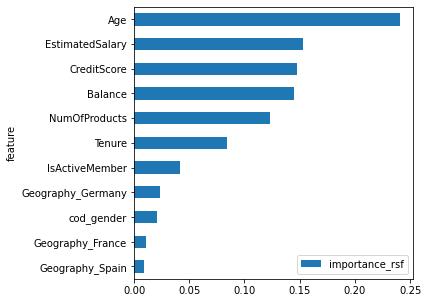

In [67]:
df_fi_rsf.plot.barh(y='importance_rsf')

In general, numeric variables have a higher Feature Importance value than categorical variables. Then among all the independent variables, the Age variable is the variable that has the highest importance value of 0.237. In terms of customer characteristics, it is known that customers are dominated by Millennial Generation customers (approximately > 58%). Also, the Millennials age category also has a fairly low percentage of churn, so this Bank's products include products that make Millennials feel at home and marketing can be focused on targeting the Millennials' market so that the potential for churn decreases.

In [68]:
df["EstimatedSalary"].groupby(df["gen"]).mean()

gen
Baby Boomer         96251.039226
Gen X              101438.260989
Gen Z              102179.128977
Millenials          99558.870036
Traditionalists    101700.846667
Name: EstimatedSalary, dtype: float64

This must also be balanced by taking into account the Estimated Salary of the customer who has the second highest Feature importance value. The Millennials dominance factor causes the characteristic of the churn variable to have a higher average Estimated Salary, so that a small Salary does not mean customers will churn. This also means that the market for this Bank is actually Millennials, who have an average Estimated Salary that is relatively smaller than the Generation above.

Geography and Gender variables are the variables that have the least importance. So that country of origin and gender do not play too much a role in making decisions about whether to churn or not.

Conclusion: Focus on customers who are at the age of the Millennial Generation (27-40 years) by creating products or promotional programs that they like. Even though the average Estimated Salary of the Millennial Generation is quite small, with a large number and characteristics that are quite loyal to this Bank, it can be said that Millennials are a very potential market to target.